### Student Information
Name: Lee Huai

Student ID: 111065524

GitHub ID: chihuahualee828

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [1030]:
### Begin Assignment Here

## **Section 1, take home exercise** 
Export neccessary packages first(some are imported later on) and some neccessary preparation code for exercises

In [1031]:
import pandas as pd
# my functions
import sys
sys.path.append('../helpers')
import data_mining_helpers as dmh
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('punkt')
import numpy as np


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nick0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1032]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [1033]:
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

##### Answer here:
some variants for

```python 
X.iloc[:10, 0]
X.loc[:10, 'text']
```

In [1034]:
print(X["text"][:10])
print(X.text[:10])
print(X["text"].iloc[:10])

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object
0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquel

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

##### Answer here:
`.isnull()` did not detect the null on some rows (3,4,6 here) because they are not actually nan but they are str datatype(empty string or None,Nan as string) and cannot be discerned as null.

In [1035]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])

NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### **>>> Exercise 6 (take home)**:
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [1036]:
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
print(X_sample.shape)
display(X_sample)

(2257, 3)
(1000, 3)


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


In [1037]:
print(X.groupby("category_name").size()/X.shape[0])
print(X_sample.groupby("category_name").size()/X_sample.shape[0])

category_name
alt.atheism               0.212672
comp.graphics             0.258751
sci.med                   0.263181
soc.religion.christian    0.265397
dtype: float64
category_name
alt.atheism               0.206
comp.graphics             0.247
sci.med                   0.277
soc.religion.christian    0.270
dtype: float64


##### Answer here:
1. by printing the shape of X and X_sample, we can see the shape changed from (2257, 3) to (1000, 3).

2. the index order of the records is not longer maintained since we randomly sampled 1000 from the original.

3. we can see the distribution of each category has changed since sampling is random, but is still somewhat close due to the representative nature of sampling.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

<Axes: title={'center': 'Category Distribution'}, xlabel='category_name'>

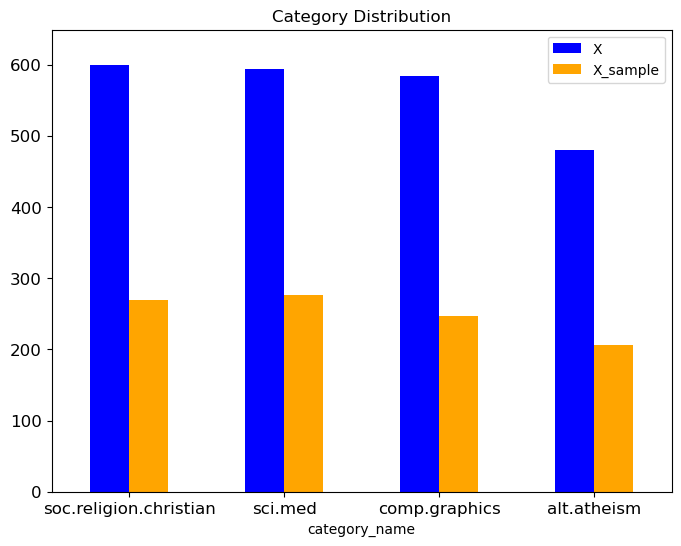

In [1038]:
# Answer here

combined = pd.concat([X["category_name"].value_counts(), X_sample["category_name"].value_counts()], axis=1)

combined.columns = ["X", "X_sample"]

upper_bound = max(combined.X + 50)
# Plot the data with blue and orange bars side by side
combined.plot(kind='bar', rot=0, title="Category Distribution", color=['blue', 'orange'], ylim = [0, upper_bound], 
                   fontsize=12, figsize=(8, 6))


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

CountVectorizer first:

In [1039]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0]) # doc index

(2257, 35788)
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


Find the fifth record second term with frequency 1:

In [1040]:
X_counts[4, :100].toarray()

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [1041]:
# Answer here
# X_counts[4,:100].toarray()==1)[0] get the true/false array of the 5th record, [1] will then find the second true in the array,
count_vect.get_feature_names_out()[:100][(X_counts[4,:100].toarray()==1)[0]][1]

# or this:
count_vect.get_feature_names_out()[(X_counts[4].toarray()==1)[0]][1]

'01'

So this other 1 in the same record(5th) in the first 100 features, that is the second one(there are only two features with count 1 in the first 100 features), and that feature is the 38th feature in the entire feature space, however, instead of just using 
```python 
count_vect.get_feature_names_out()[37] 
```
like below, we can use the code one block above to access that feature name.

In [1042]:
count_vect.get_feature_names_out()[37]

'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

So instead of drawing out all the terms, which are 35788 in total, and most of them are not common words throuhout all the documents, this will lead to spares matrix where there are a lot of zeros, so we try to find out the frequency distribution of only top k most frequent terms, here we take top 20, and instead of drawing out all the documents, we only sample 100 documents, this should be much faster to execute and visually more readable(the fig size has to be large enough)since the space is limited, we cannot draw out all thoudsands of rows without squeezing them.


In [1043]:
import seaborn as sns

[134  92   1 ...   1   1   1]
[32142 23610 32493  4992 18474 17556 32139 18551 35638 14601 23250 32270
  6298 14887  5410 12626 16254  5549 23733 35157]


,term_the,term_of,term_to,term_and,term_is,term_in,term_that,term_it,term_you,term_for,term_not,term_this,term_be,term_from,term_are,term_edu,term_have,term_as,term_on,term_with
doc_561,2,2,2,2,2,1,0,1,0,0,1,0,2,1,0,2,0,0,0,0
doc_440,10,5,2,0,3,5,2,0,0,0,1,0,1,1,0,1,0,1,1,0
doc_1513,26,20,23,5,17,15,11,8,7,7,2,3,4,2,5,1,6,7,4,1
doc_1360,6,7,10,2,4,5,5,4,2,0,1,4,0,1,0,0,2,1,0,1
doc_259,2,1,2,3,1,0,3,3,1,0,0,2,1,1,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
doc_1340,6,10,8,13,4,5,6,3,0,2,3,0,0,2,1,0,1,0,3,1
doc_965,146,70,66,44,27,49,50,40,29,15,29,17,7,9,29,0,21,23,15,9
doc_70,12,17,3,1,8,9,7,2,4,3,4,1,0,1,3,0,2,3,1,1
doc_845,2,3,1,1,0,1,0,0,0,3,0,0,0,1,2,0,0,0,1,0


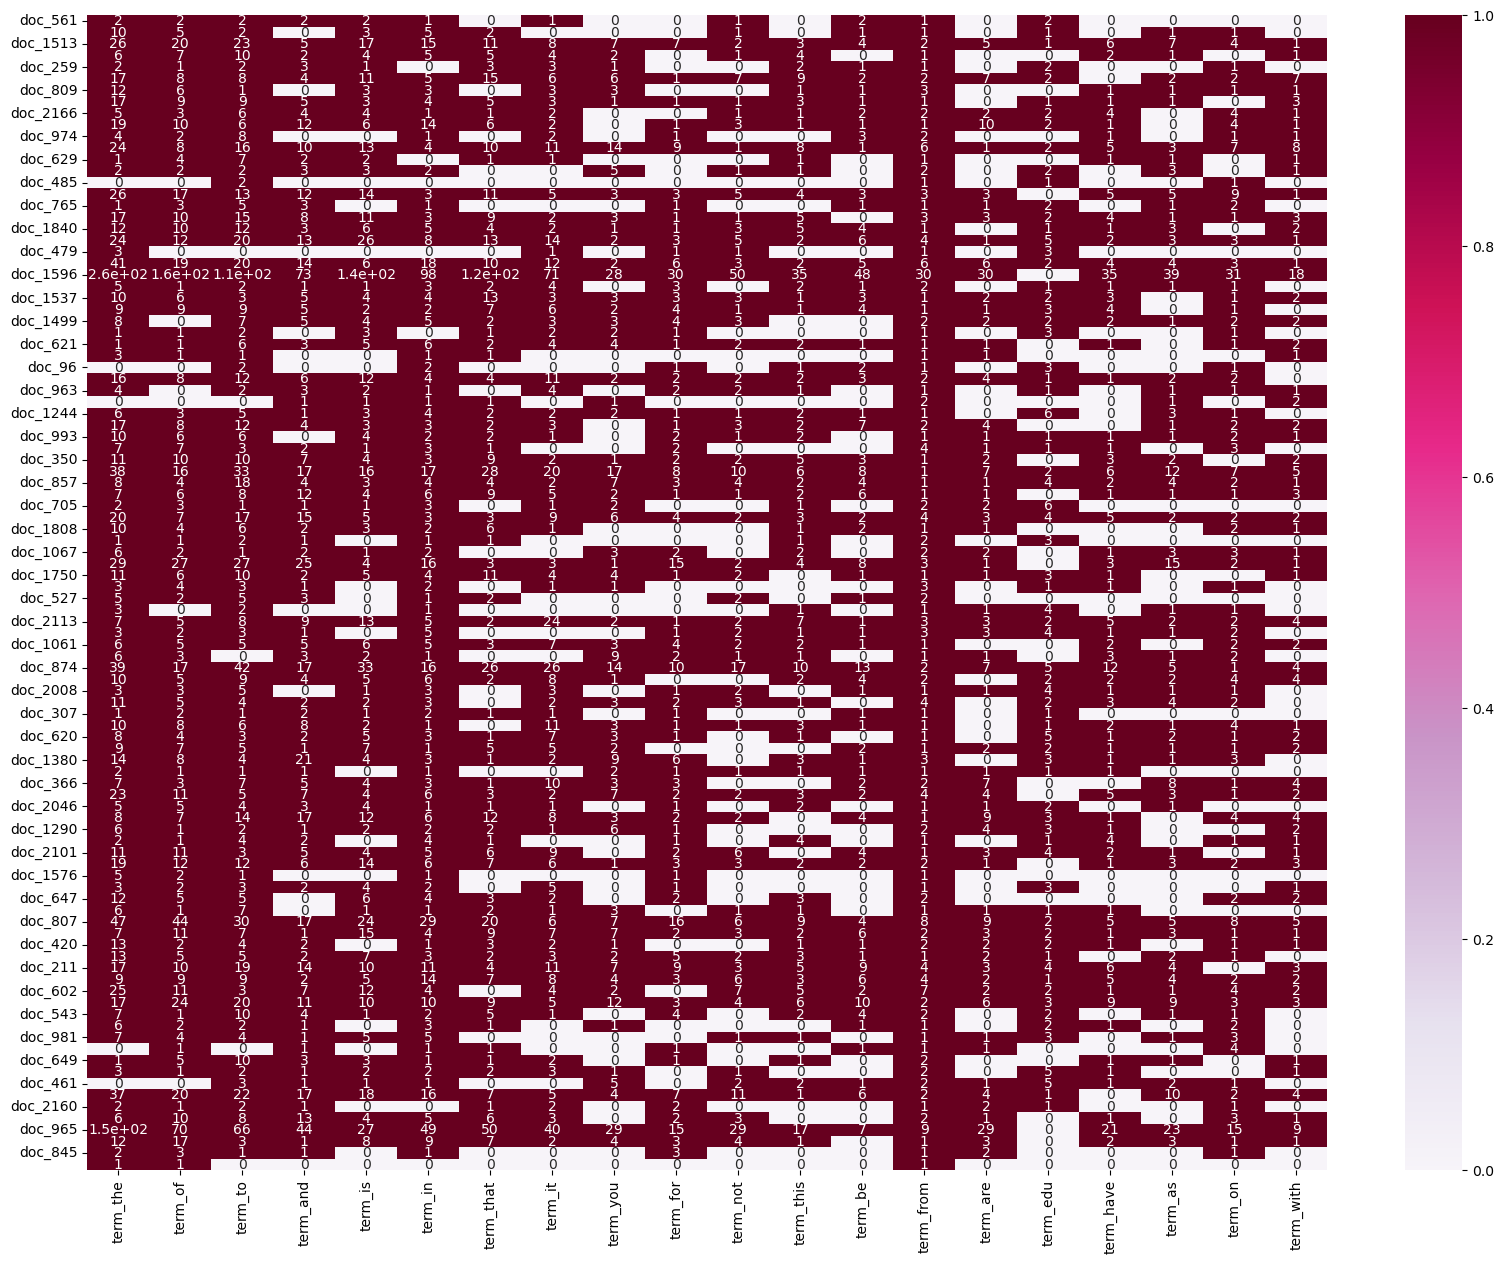

In [1044]:
# Answer here
# get top k frequent terms within all articles
feature_frequencies = np.array(X_counts.toarray().sum(axis=0))
print(feature_frequencies)
top_k_indices = feature_frequencies.argsort()[::-1][:20]
print(top_k_indices)

top_k_features = [count_vect.get_feature_names_out()[i] for i in top_k_indices]

X_sample = X.sample(n=100, random_state=42)
X_counts_sample = X_counts[X_sample.index]
# top_k_freq = np.sort(feature_frequencies)[::-1][:20]
# for i, feature, freq in zip(top_k_indices,top_k_features,top_k_freq):
#     print(i, feature, freq)
plot_x = ["term_"+str(i) for i in top_k_features]
plot_y = ["doc_"+ str(i) for i in list(X_sample.index)]
plot_z = X_counts_sample.toarray()[:,top_k_indices]


# plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[:]]
# plot_y = ["doc_"+ str(i) for i in list(X.index)[:]]
# plot_z = X_counts[:, :].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(20, 15))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

We can see the heatmap now is much denser.

### **>>> Exercise 12 (take home):**
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [1045]:
from sklearn.decomposition import PCA

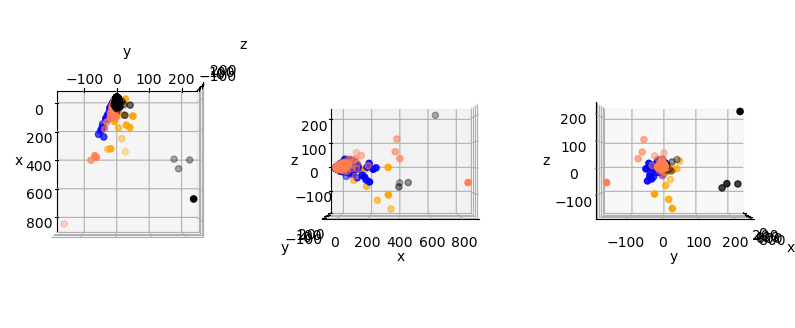

In [1046]:
# Answer here

# reduce dimensions to 3.
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'orange']

# plot
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax1.scatter(xs, ys, zs, c = c, marker='o')
    ax2.scatter(xs, ys, zs, c = c, marker='o')
    ax3.scatter(xs, ys, zs, c = c, marker='o')

for each in axs:
    each.set_axis_off()

for each in (ax1,ax2,ax3):
    each.set_xlabel('x')
    each.set_ylabel('y')
    each.set_zlabel('z')

ax1.view_init(elev=90, azim=0) # view along z axis 
ax2.view_init(elev=0, azim=-90) # view along y axis
ax3.view_init(elev=0, azim=0) # view along x axis  

plt.show()

##### Answer here:
We plot the result using 3D plot, with 3 different views from different angles, here we view along z,y,x axis (view on xy, xz, yz planes).

We observed that even in 3D space after PCA dimension reduction, the point clusters of each category are still very squeezed together, the seperation of data is still not obvious enough here, which means that the projection of these features does not really capture that large of variation in the data.
This maybe because that, as mentioned in master notebook, PCA was applied to the raw frequencies and some words are not really unique to a document. Only categorizing by word frequency is considered a "bag of words" approach. The seperation between data could be more obvious if we create better features using TF-IDF, but that is in the later part of the notebook, so we did not do it here.


### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [1047]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [1048]:
import plotly.express as px
import plotly.graph_objects as go

In [1049]:
# Answer here
# get top 300 most frequent term's indices
top_300_indices = term_frequencies.argsort()[::-1][:300]
# sort them back in the original order(optional, this is just to show the plot x-lable in the original order(that is alphabetical))
top_300_indices = top_300_indices[np.argsort(top_300_indices)]
print(top_300_indices)

top_300_features = [count_vect.get_feature_names_out()[i] for i in top_300_indices]
print(top_300_features)

x = top_300_features
y = term_frequencies[top_300_indices]

# fig = px.bar(x=x, y=y)
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y,
                    marker=dict(
                    color=y,
                    colorscale='Reds', 
                    colorbar=dict(title='Scaled Value', tickvals=[min(y), max(y)]) 
                )))


# Create a layout for the chart
fig.update_xaxes(
    title_text="term",
    fixedrange=False,
    range=[0, 100],
    constrain="domain",
    tickmode='array',  # Set tickmode to 'array' to use an array of tickvals
    tickvals=list(range(len(x))),  # Set tickvals to the range of x-values
    ticktext=x,  # Set ticktext to the x-labels
    autorange=False, showline=True
)

fig.update_yaxes(
    title_text="frequency",
    fixedrange=True
)
fig.update_layout(hovermode="x")
fig.show(config={"scrollZoom": True, "displayModeBar": True})

[  242   677   755  1102  1341  1586  3958  4017  4215  4471  4486  4720
  4808  4852  4938  4992  5110  5195  5201  5203  5340  5410  5430  5529
  5549  5698  5714  5718  5906  6024  6140  6212  6298  6333  6358  6371
  6412  6430  6540  6557  6561  6597  6744  7005  7062  7480  7505  7643
  7718  7766  7800  7965  8071  8544  8553  8557  8559  8609  8713  9072
  9093  9338  9992 10037 10324 10699 10736 10752 11493 11520 11904 12014
 12051 12052 12096 12472 12626 12711 13091 13400 13491 13511 13521 13567
 13672 13908 13952 14021 14212 14277 14281 14309 14357 14601 14733 14819
 14887 15319 15405 15511 15521 15545 15576 15591 15699 15837 16014 16216
 16254 16302 16328 16409 16418 16470 16482 16603 16642 16881 16908 16913
 16999 17268 17356 17556 17854 18268 18474 18551 18585 18774 18880 18957
 19076 19218 19458 19787 19841 19924 20048 20167 20198 20253 20342 20373
 20463 20470 20517 20770 20825 20862 20903 20978 21033 21209 21322 21332
 21386 21732 22215 22270 22379 22403 22509 22541 22

You can scroll to zoom in/out on the image, pan over to right to see features at the back, and hover over the bar to better see the term and frequency.

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [1050]:
# get top 100 this time
top_100_indices = term_frequencies.argsort()[::-1][:100]
top_100_indices = top_100_indices[np.argsort(top_100_indices)]
print(top_100_indices)

top_100_features = [count_vect.get_feature_names_out()[i] for i in top_100_indices]
print(top_100_features)

x = top_100_features
y = term_frequencies[top_100_indices]
# fig = px.bar(x=x, y=y)
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y,
                    marker=dict(
                    color=y,
                    colorscale='Reds', 
                    colorbar=dict(title='Scaled Value', tickvals=[min(y), max(y)]) 
                )))

# Create a layout for the chart
fig.update_xaxes(
    title_text="term",
    fixedrange=False,
    range=[0, 100],
    constrain="domain",
    tickmode='array',  # Set tickmode to 'array' to use an array of tickvals
    tickvals=list(range(len(x))),  # Set tickvals to the range of x-values
    ticktext=x,  # Set ticktext to the x-labels
    autorange=False, showline=True
)

fig.update_yaxes(
    title_text="frequency",
    fixedrange=True
)


fig.show(config={"scrollZoom": True, "displayModeBar": True})

[ 3958  4720  4808  4852  4938  4992  5195  5410  5529  5549  5698  6298
  6333  6358  6430  7480  7505  7766  9072 12014 12051 12096 12626 14601
 14887 15319 15521 15576 16014 16216 16254 16302 16642 16908 17268 17556
 18474 18551 18774 19076 19458 20198 20253 20978 21209 21322 22215 22541
 23123 23250 23610 23733 23741 23757 23870 23915 24020 24052 24784 25663
 27031 28755 29121 29578 30068 30173 31077 31180 32131 32139 32142 32152
 32160 32164 32202 32221 32233 32253 32270 32417 32493 33597 33773 33847
 33858 34229 34703 34775 34879 34923 34935 34954 34982 35006 35057 35157
 35312 35350 35638 35648]
['about', 'all', 'also', 'am', 'an', 'and', 'any', 'are', 'article', 'as', 'at', 'be', 'because', 'been', 'believe', 'but', 'by', 'can', 'com', 'do', 'does', 'don', 'edu', 'for', 'from', 'get', 'god', 'good', 'had', 'has', 'have', 'he', 'his', 'how', 'if', 'in', 'is', 'it', 'jesus', 'just', 'know', 'like', 'lines', 'many', 'may', 'me', 'more', 'my', 'no', 'not', 'of', 'on', 'one', 'only'

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [1051]:
# Answer here

# sort by frequency
sorted_indices = term_frequencies.argsort()[::-1][:]

# get top 300
x = [count_vect.get_feature_names_out()[i] for i in sorted_indices[:300]]
y = term_frequencies[sorted_indices[:300]]

fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y,
                    marker=dict(
                    color=y,
                    colorscale='Reds', 
                    colorbar=dict(title='Scaled Value', tickvals=[min(y), max(y)]) 
                )))


fig.update_xaxes(
    title_text="term",
    fixedrange=False,
    range=[0, 100],
    constrain="domain",
    tickmode='array',  
    tickvals=list(range(len(x))),  
    ticktext=x,
    autorange=False, showline=True
)

fig.update_yaxes(
    title_text="frequency",
    fixedrange=True
)


fig.show(config={"scrollZoom": True, "displayModeBar": True})

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [1052]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [1053]:
# Answer here
mlb = preprocessing.LabelBinarizer()
mlb.fit(X['category_name'])
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[:10]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med,"[0, 0, 1, 0]"


##### Answer here:
Yes, it does, we just have to reintialize a LabelBinarizer and fit it with `category_name` column, see below:

# **Part2 - New Dataset:**

## 1. Data Preparation
read text file using pandas and combine three datasets into one file, then give it column names:

In [1054]:
data_amazon = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None)
data_imdb = pd.read_csv('imdb_labelled.txt', sep='\t', header=None)
data_yelp = pd.read_csv('yelp_labelled.txt', sep='\t', header=None)

print(data_amazon.shape)
print(data_imdb.shape)
print(data_yelp.shape)

# combined all datas and assign column name
data_combined = pd.concat([data_amazon, data_imdb, data_yelp], ignore_index=True)
data_combined.columns=['sentence', 'score']
data_combined

(1000, 2)
(748, 2)
(1000, 2)


,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


## 2. Dealing with missing values and duplicates

In [1055]:
# check if missing value exists
data_combined.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


create label based on score, 1 as positive and 0 as negative:

In [1056]:
label_name = ['negative', 'positive']
data_combined['label_name'] = data_combined.score.apply(lambda t: label_name[t])
data_combined

,sentence,score,label_name
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,positive
...,...,...,...
2743,I think food should have flavor and texture an...,0,negative
2744,Appetite instantly gone.,0,negative
2745,Overall I was not impressed and would not go b...,0,negative
2746,"The whole experience was underwhelming, and I ...",0,negative


In [1057]:
print(sum(data_combined.duplicated()))

# we drop the second same record, keep the first
data_combined.drop_duplicates(keep="first", inplace=True)

# reset the index since some records in between are removed
data_combined.reset_index(drop=True, inplace=True)

print(sum(data_combined.duplicated()))
print(data_combined.shape)
data_combined

17
0
(2731, 3)


,sentence,score,label_name
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,positive
...,...,...,...
2726,I think food should have flavor and texture an...,0,negative
2727,Appetite instantly gone.,0,negative
2728,Overall I was not impressed and would not go b...,0,negative
2729,"The whole experience was underwhelming, and I ...",0,negative


## 5.  Data Preprocessing

### 5.1 Sampling

In [1058]:
data_combined_sample = data_combined.sample(n=1000, random_state=42)
display(data_combined_sample)

,sentence,score,label_name
999,Loved the casting of Jimmy Buffet as the scien...,1,positive
2028,I live in the neighborhood so I am disappointe...,0,negative
1494,DELETE this film from your mind!,0,negative
941,Very much disappointed with this company.,0,negative
73,Nice docking station for home or work.,1,positive
...,...,...,...
1985,Owner's are really great people.!,1,positive
1666,I do not know if this was Emilio Estevez's dir...,1,positive
2464,"As for the service, I thought it was good.",1,positive
2643,"i felt insulted and disrespected, how could yo...",0,negative


            data_combined  data_combined_sample
label_name                                     
positive             1376                   511
negative             1355                   489


<Axes: title={'center': 'Category Distribution'}, xlabel='label_name'>

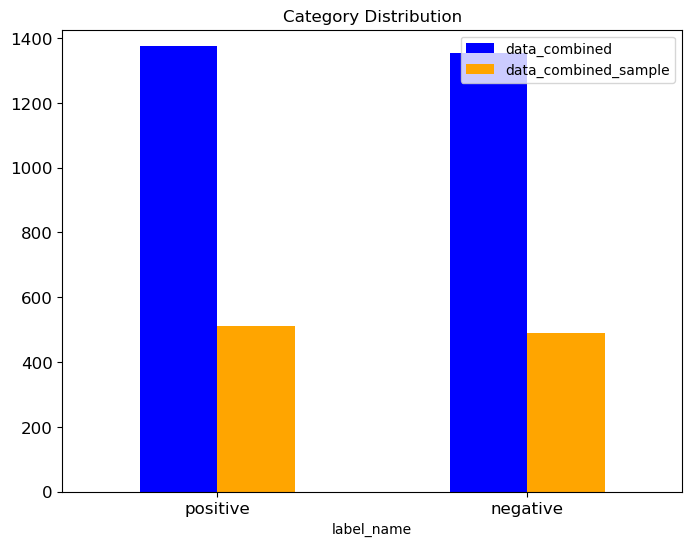

In [1059]:
combined = pd.concat([data_combined["label_name"].value_counts(), data_combined_sample["label_name"].value_counts()], axis=1)
combined.columns = ["data_combined", "data_combined_sample"]
print(combined)

# Plot the data with blue and orange bars side by side
combined.plot(kind='bar', rot=0, title="Category Distribution", color=['blue', 'orange'], ylim = [0, max(combined.data_combined + 50)], 
                   fontsize=12, figsize=(8, 6))


### 5.2 Feature Creation

In [1060]:
data_combined['unigrams'] = data_combined['sentence'].apply(lambda x: dmh.tokenize_text(x))
data_combined

,sentence,score,label_name,unigrams
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,positive,"[The, mic, is, great, .]"
...,...,...,...,...
2726,I think food should have flavor and texture an...,0,negative,"[I, think, food, should, have, flavor, and, te..."
2727,Appetite instantly gone.,0,negative,"[Appetite, instantly, gone, .]"
2728,Overall I was not impressed and would not go b...,0,negative,"[Overall, I, was, not, impressed, and, would, ..."
2729,"The whole experience was underwhelming, and I ...",0,negative,"[The, whole, experience, was, underwhelming, ,..."


### 5.3 Feature subset selection

Get word frequency matrix with CountVectorizer:

In [1061]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_combined_counts = count_vect.fit_transform(data_combined.sentence) #learn the vocabulary and return document-term matrix
print(data_combined_counts.shape)
print(data_combined_counts[:10]) # doc index

(2731, 5155)
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1
  (1, 1993)	1
  (1, 713)	1
  (1, 1603)	1
  (1, 4861)	1
  (2, 1829)	1
  (2, 4531)	1
  (2, 2023)	1
  :	:
  (6, 3097)	2
  (6, 3968)	1
  (6, 1440)	1
  (6, 4538)	1
  (6, 3124)	2
  (7, 2113)	1
  (7, 2282)	1
  (7, 5138)	2
  (7, 273)	1
  (7, 3611)	1
  (7, 3200)	1
  (7, 2980)	1
  (7, 4558)	1
  (8, 4609)	1
  (8, 3010)	1
  (8, 3889)	1
  (8, 4974)	1
  (8, 2982)	1
  (8, 2918)	1
  (9, 3097)	1
  (9, 2918)	1
  (9, 5017)	1
  (9, 4973)	1
  (9, 216)	1
  (9, 4593)	1


In [1062]:
count_vect.get_feature_names_out()[100]

'accomodate'

In [1063]:
analyze = count_vect.build_analyzer()
analyze(data_combined.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

Draw heatmap for document and term frequency, with top 20 terms and sample of 100 docs:

[ 1 36  3 ...  1  2  1]
[4531  216 2432 2427 4609 4558 3097 4968 2314 1829 4529 3063 5069 2982
 4890 1993 3122 5138 2023  637]
['the', 'and', 'it', 'is', 'to', 'this', 'of', 'was', 'in', 'for', 'that', 'not', 'with', 'my', 'very', 'good', 'on', 'you', 'great', 'but']


,term_the,term_and,term_it,term_is,term_to,term_this,term_of,term_was,term_in,term_for,term_that,term_not,term_with,term_my,term_very,term_good,term_on,term_you,term_great,term_but
doc_999,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2028,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
doc_1494,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_941,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
doc_73,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
doc_1001,1,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
doc_1598,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
doc_402,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
doc_1084,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


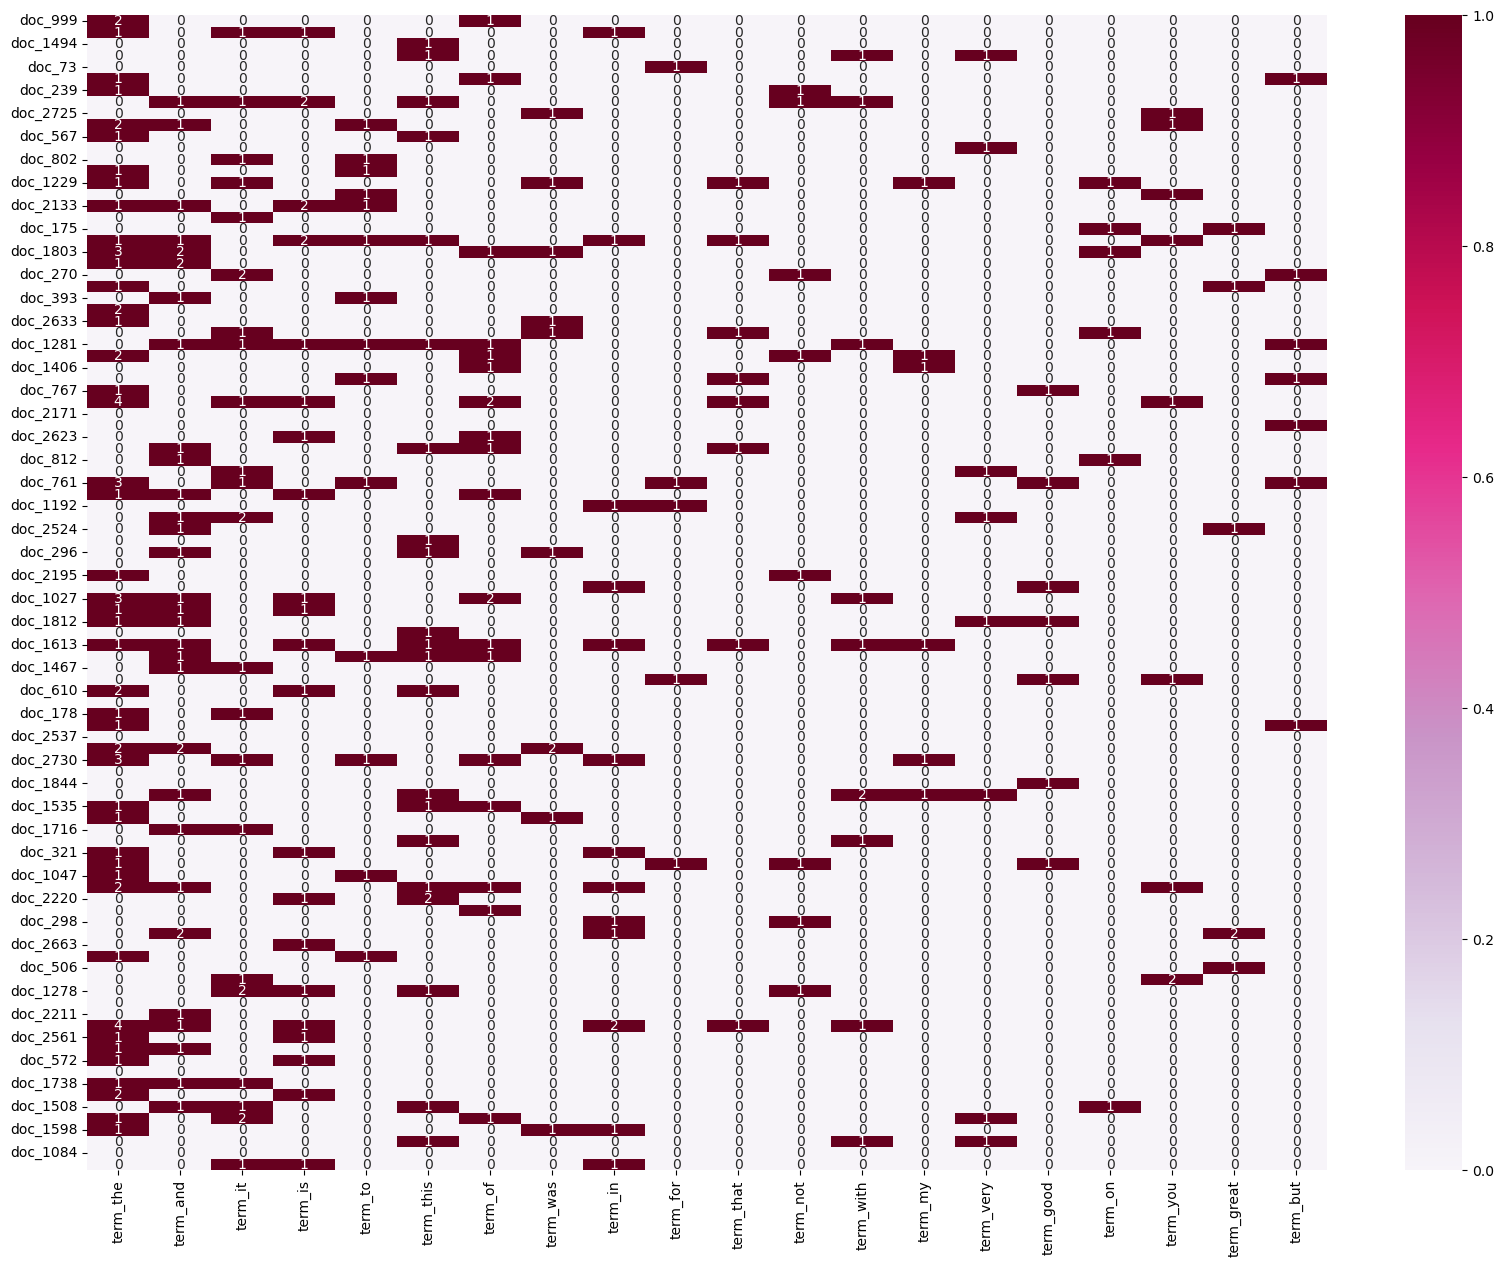

In [1064]:

feature_frequencies = np.array(data_combined_counts.toarray().sum(axis=0))
print(feature_frequencies)
top_k_indices = feature_frequencies.argsort()[::-1][:20]
print(top_k_indices)

top_k_features = [count_vect.get_feature_names_out()[i] for i in top_k_indices]
print(top_k_features)

data_combined_sample = data_combined.sample(n=100, random_state=42)
data_combined_counts_sample = data_combined_counts[data_combined_sample.index]

# top_k_freq = np.sort(feature_frequencies)[::-1][:20]

# plot_z is data, plot_x is column names, plot_y is row names
plot_x = ["term_"+str(i) for i in top_k_features]
plot_y = ["doc_"+ str(i) for i in list(data_combined_sample.index)]
plot_z = data_combined_counts_sample.toarray()[:,top_k_indices]

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(20, 15))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)


Obeservation:

Since this time, the dataset has a lot of short sentences, which means that their total word count is relatively small, hence the matrix is considerably spareser even after ranking top 20 terms.

### 5.4 Dimensionality Reduction


In [1065]:
from sklearn.decomposition import PCA

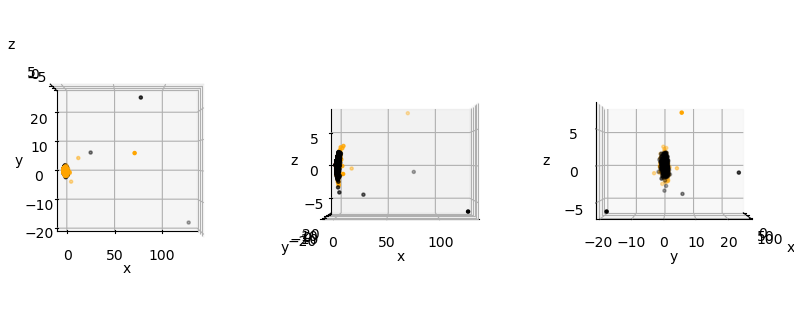

In [1066]:
# Answer here
data_combined_reduced = PCA(n_components = 3).fit_transform(data_combined_counts.toarray())
col = ['black', 'orange']

# plot
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

for c, label in zip(col, label_name):
    xs = data_combined_reduced[data_combined['label_name'] == label].T[0]
    ys = data_combined_reduced[data_combined['label_name'] == label].T[1]
    zs = data_combined_reduced[data_combined['label_name'] == label].T[2]
    ax1.scatter(xs, ys, zs, c = c, marker='o', s=5)
    ax2.scatter(xs, ys, zs, c = c, marker='o', s=5)
    ax3.scatter(xs, ys, zs, c = c, marker='o', s=5)

for each in axs:
    each.set_axis_off()

for each in (ax1,ax2,ax3):
    each.set_xlabel('x')
    each.set_ylabel('y')
    each.set_zlabel('z')

ax1.view_init(elev=90, azim=-90) # view along z axis 
ax2.view_init(elev=0, azim=-90) # view along y axis 
ax3.view_init(elev=0, azim=0) # view along x axis 

plt.show()

##### Observations:
We plot the result using 3D plot, with 3 different views from different angles, here we view along z,y,x axis (view on xy, xz, yz planes).

We observed that even in 3D space after PCA dimension reduction, the point clusters of each category are still very squeezed together, the seperation of data is still not obvious enough here, which means that the projection of these features does not really capture that large of variation in the data.
This maybe because that, as mentioned in master notebook, PCA was applied to the raw frequencies and some words are not really unique to a document. Only categorizing by word frequency is considered a "bag of words" approach. The seperation between data could be more obvious if we create better features using TF-IDF, but that is in the later part of the notebook, so we did not do it here.


### 5.5 Attribute Transformation / Aggregation
bar chart visualization:

In [1067]:
import plotly.express as px
import plotly.graph_objects as go

In [1068]:
# get top 100 frequent terms indices
top_100_indices = feature_frequencies.argsort()[::-1][:100]
# sort them back in the original order (optional)
top_100_indices = top_100_indices[np.argsort(top_100_indices)]
print(top_100_indices)

x = [count_vect.get_feature_names_out()[i] for i in top_100_indices]
y = feature_frequencies[top_100_indices]

# fig = px.bar(x=x, y=y)
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y,
                    marker=dict(
                    color=y,
                    colorscale='Reds', 
                    colorbar=dict(title='Scaled Value', tickvals=[min(y), max(y)]) 
                )))


# Create a layout for the chart
fig.update_xaxes(
    title_text="term",
    fixedrange=False,
    range=[0, 100],
    constrain="domain",
    tickmode='array',  # Set tickmode to 'array' to use an array of tickvals
    tickvals=list(range(len(x))),  # Set tickvals to the range of x-values
    ticktext=x,  # Set ticktext to the x-labels
    autorange=False, showline=True
)

fig.update_yaxes(
    title_text="frequency",
    fixedrange=True
)
fig.update_layout(hovermode="x")
fig.show(config={"scrollZoom": True, "displayModeBar": True})

[  75  154  179  193  214  216  243  273  297  314  367  373  416  427
  433  466  467  637  647  674 1040 1338 1352 1580 1585 1603 1742 1822
 1829 1883 1954 1982 1993 2023 2067 2105 2113 2122 2158 2239 2282 2314
 2427 2432 2493 2638 2710 2737 2809 2931 2954 2963 2982 3026 3032 3043
 3063 3097 3122 3124 3128 3144 3166 3322 3351 3492 3568 3626 3994 4161
 4176 4201 4526 4529 4531 4537 4545 4548 4558 4593 4609 4629 4821 4867
 4890 4968 4993 5012 5015 5017 5021 5025 5032 5049 5069 5091 5096 5107
 5138 5141]


You can scroll to zoom in/out on the image, pan over to right to see features at the back, and hover over the bar to better see the term and frequency.

long tail visualization:

In [1069]:
sorted_indices = feature_frequencies.argsort()[::-1][:]

# get top 300
x = [count_vect.get_feature_names_out()[i] for i in sorted_indices[:100]]
y = feature_frequencies[sorted_indices[:100]]

fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y,
                    marker=dict(
                    color=y,
                    colorscale='Reds', 
                    colorbar=dict(title='Scaled Value', tickvals=[min(y), max(y)]) 
                )))


fig.update_xaxes(
    title_text="term",
    fixedrange=False,
    range=[0, 100],
    constrain="domain",
    tickmode='array',  
    tickvals=list(range(len(x))),  
    ticktext=x,
    autorange=False, showline=True
)

fig.update_yaxes(
    title_text="frequency",
    fixedrange=True
)


fig.show(config={"scrollZoom": True, "displayModeBar": True})

transform values into the log distribution:

In [1070]:
import math

In [1071]:
feature_frequencies_log = np.array([math.log(i) for i in feature_frequencies])
top_100_indices = feature_frequencies_log.argsort()[::-1][:100]
top_100_indices = top_100_indices[np.argsort(top_100_indices)]

x = [count_vect.get_feature_names_out()[i] for i in top_100_indices]
y = feature_frequencies_log[top_100_indices]

# fig = px.bar(x=x, y=y)
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y,
                    marker=dict(
                    color=y,
                    colorscale='Reds', 
                    colorbar=dict(title='Scaled Value', tickvals=[min(y), max(y)]) 
                )))


# Create a layout for the chart
fig.update_xaxes(
    title_text="term",
    fixedrange=False,
    range=[0, 100],
    constrain="domain",
    tickmode='array',  # Set tickmode to 'array' to use an array of tickvals
    tickvals=list(range(len(x))),  # Set tickvals to the range of x-values
    ticktext=x,  # Set ticktext to the x-labels
    autorange=False, showline=True
)

fig.update_yaxes(
    title_text="frequency",
    fixedrange=True
)
fig.update_layout(hovermode="x")
fig.show(config={"scrollZoom": True, "displayModeBar": True})

### 5.6 Discretization and Binarization
perform binarization on label_name (or score(which is 0/1 label, already binary)), since we only have 2 labels, and score is 0 and 1, one-hot encoding in this case perhaps is meaningless?

In [1072]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [1073]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(data_combined['label_name'])
data_combined['bin_label'] = mlb.transform(data_combined['label_name']).tolist()
data_combined[:9]

,sentence,score,label_name,unigrams,bin_label
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


### 6. Data Exploration
Let's find out the most similiar sentence(except itself) to the first sentence with Cosine Similarity using count(just an example):

In [1074]:
document_to_transform_1 = []
sentence_1 = data_combined['sentence'][0]
document_to_transform_1.append(sentence_1)

document_to_transform_2 = []
for each in data_combined['sentence'][1:]:
    document_to_transform_2.append(each)


In [1075]:
print(document_to_transform_1)
print(document_to_transform_2[:10])

['So there is no way for me to plug it in here in the US unless I go by a converter.']
['Good case, Excellent value.', 'Great for the jawbone.', 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!', 'The mic is great.', 'I have to jiggle the plug to get it to line up right to get decent volume.', 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.', 'If you are Razr owner...you must have this!', 'Needless to say, I wasted my money.', 'What a waste of money and time!.', 'And the sound quality is great.']


In [1076]:
from sklearn.preprocessing import binarize

In [1077]:
# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [1078]:
from sklearn.metrics.pairwise import cosine_similarity

In [1079]:
# Calculate Cosine Similarity for each sentences
similarity_scores = []
most_similar = 0
max_similarity = 0
for i, each in enumerate(document_vector_count_2):
    cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, each, dense_output=True)
    if cos_sim_count_1_2 > max_similarity:
        max_similarity = cos_sim_count_1_2
        most_similar = i+1
    similarity_scores.append(cos_sim_count_1_2)

print(similarity_scores[:10])

print(f"1st sentence: {document_to_transform_1[0]}")
print(f"Most similar to 1st sentence is {most_similar+1} sentence. Sentence: '{data_combined['sentence'][most_similar]}'")
print(f"The Cosine Similarity using count is: {similarity_scores[most_similar-1][0][0]}")

[array([[0.]]), array([[0.21821789]]), array([[0.12598816]]), array([[0.21821789]]), array([[0.27888668]]), array([[0.08399211]]), array([[0.]]), array([[0.08908708]]), array([[0.]]), array([[0.17817416]])]
1st sentence: So there is no way for me to plug it in here in the US unless I go by a converter.
Most similar to 1st sentence is 1378 sentence. Sentence: 'There is no plot here to keep you going in the first place.  '
The Cosine Similarity using count is: 0.4841820261350419


# >>> **Part3:**

### 1. Generate meaningful new data visualizations

Let's do wordcloud to visualize frequent words throughout the whole document: 

In [1080]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

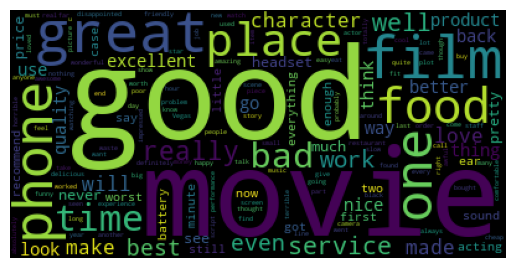

In [1081]:
wordcloud = WordCloud().generate(data_combined.sentence.str.cat(sep=' '))

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

we can see that wordcloud show some frequent words in the dataset, but it seems like it does not just use sheer word frequency? since the most frequent word in our whole dataset `the` is not shown here.

We then try to generate the wordcloud for all positive sentences:

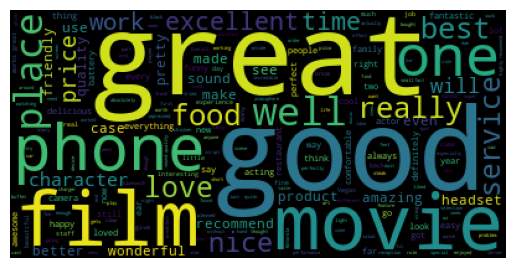

In [1082]:
wordcloud = WordCloud().generate(data_combined[data_combined['score'] == 1].sentence.str.cat(sep=' '))

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

And for negative sentences as well:

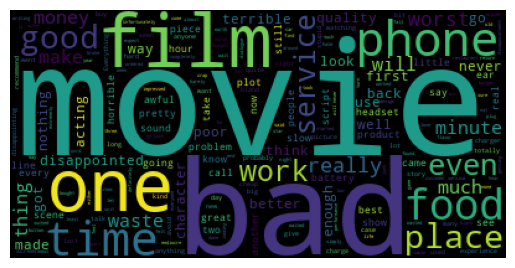

In [1083]:
wordcloud = WordCloud().generate(data_combined[data_combined['score'] == 0].sentence.str.cat(sep=' '))

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Create another visualization: 

We would like to see how many times each term appearn in the whole dataset, that is document frequency(so if a term appear in one sentence multiple times, it is counted as one, we do the same thing later on in the TF-IDF section), so we create a bar chart for top k doc frequency terms:

In [1084]:
# sum each term doc frequency
data_combined_counts[data_combined_counts >= 1] = 1
feature_frequencies = np.array(data_combined_counts.toarray().sum(axis=0))

# get top 100 doc frequent terms indices
top_100_indices = feature_frequencies.argsort()[::-1][:100]
# sort them back in the original order (optional)
top_100_indices = top_100_indices[np.argsort(top_100_indices)]
print(top_100_indices)

x = [count_vect.get_feature_names_out()[i] for i in top_100_indices]
y = feature_frequencies[top_100_indices]

# fig = px.bar(x=x, y=y)
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y,
                    marker=dict(
                    color=y,
                    colorscale='Reds', 
                    colorbar=dict(title='Scaled Value', tickvals=[min(y), max(y)]) 
                )))


# Create a layout for the chart
fig.update_xaxes(
    title_text="term",
    fixedrange=False,
    range=[0, 100],
    constrain="domain",
    tickmode='array',  # Set tickmode to 'array' to use an array of tickvals
    tickvals=list(range(len(x))),  # Set tickvals to the range of x-values
    ticktext=x,  # Set ticktext to the x-labels
    autorange=False, showline=True
)

fig.update_yaxes(
    title_text="document frequency",
    fixedrange=True
)
fig.update_layout(hovermode="x")
fig.show(config={"scrollZoom": True, "displayModeBar": True})

[  75  154  179  193  214  216  243  273  297  314  367  373  416  427
  433  466  467  637  647  674 1040 1338 1352 1580 1585 1603 1742 1822
 1829 1883 1954 1982 1993 2023 2067 2105 2113 2158 2239 2282 2314 2427
 2432 2493 2638 2710 2737 2809 2931 2954 2963 2982 3026 3032 3043 3063
 3097 3122 3124 3128 3144 3166 3322 3351 3492 3568 3626 3648 3994 4161
 4176 4526 4529 4531 4537 4545 4548 4558 4593 4609 4629 4821 4839 4867
 4890 4968 4993 5012 5015 5017 5021 5025 5032 5049 5069 5091 5096 5107
 5138 5141]


### 2. Generate TF-IDF features from the tokens of each text. 

In [1085]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [1086]:
vectorizer = TfidfVectorizer()

corpus = data_combined.sentence

# this will compute tfidf score for each sentence and term
tfidf_fit = vectorizer.fit_transform(corpus)
tfidf_fit.shape

tfidf_df = pd.DataFrame(tfidf_fit.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. Implement a simple Naive Bayes classifier that automatically classifies the records into their categories.

In [1087]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

we split data into 3/4 and 1/4 as training and test data, for  tfidf features and tf(word count) features:

In [1088]:
data_combined_counts = count_vect.fit_transform(data_combined.sentence)
X_train, X_test, Y_train, Y_test = train_test_split(tfidf_df, data_combined["score"], test_size=0.25, random_state=42)
X_train_count, X_test_count, Y_train_count, Y_test_count = train_test_split(data_combined_counts, data_combined["score"], test_size=0.25, random_state=42)
print(X_train.shape,X_test.shape)
print(X_train_count.shape,X_test_count.shape)

(2048, 5155) (683, 5155)
(2048, 5155) (683, 5155)


Fit training datas of tfidf and tf to form 2 classifiers:

In [1089]:
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

mnb_count = MultinomialNB()
mnb_count.fit(X_train_count, Y_train_count)

MultinomialNB()

Test out our test datas with two classifier respectively:

In [1090]:
Y_pred = mnb.predict(X_test)
Y_pred_count = mnb_count.predict(X_test_count)

True Positive:

In [1091]:
print(np.count_nonzero(Y_pred == np.array(Y_test)))
print(np.count_nonzero(Y_pred_count == np.array(Y_test_count)))

540
540


calculate accuracy and f1-score for two classifier:

In [1092]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score
)

accuray = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

accuray_count = accuracy_score(Y_test_count, Y_pred_count)
f1_count = f1_score(Y_test_count, Y_pred_count)
precision_count = precision_score(Y_test_count, Y_pred_count)
recall_count = recall_score(Y_test_count, Y_pred_count)

print(f"TF-IDF classifier accuracy: {accuray}, f1-score: {f1}, precision: {precision}, recall: {recall}")
print(f"Word frequency classifier accuracy: {accuray_count}, f1-score: {f1_count}, precision: {precision_count}, recall: {recall_count}")

TF-IDF classifier accuracy: 0.7906295754026355, f1-score: 0.7900146842878119, precision: 0.7911764705882353, recall: 0.7888563049853372
Word frequency classifier accuracy: 0.7906295754026355, f1-score: 0.7868852459016393, precision: 0.8, recall: 0.7741935483870968


#### Comment : 
Here we can see classifier trained with TF-IDF features does not actually perform that much better than pure term frequency features in terms of accuracy, only slight improvement in f1-score and recall.

This means that they have the same TP and TN as they accuracy are the same, but TF-IDF has slightly less FN compared to term frequency since it has slight improvement recall, but slightly more FP since it has slightly lower precision score.

This unsignificant improvement from term frequency to TF-IDF is normally not the case, usually there should be bigger imrpovement, this means that term frequency features already capture the relevant information to distringuish its score effectively, this could likely be due to the nature of this dataset, as we talked about before, this dataset contains a lot of short sentence, with total of 5000-ish features, this leads to very sparse doc-to-term matrix, that's why TF-IDF shows no significant imrpovement. Another potential reason could also be due to curse of dimensions(we have 5155 features here), maybe we can perform PCA first to reduce dimensions first?

# >>> **Part4:**

Here, we provide 3 sections that could potentially be improved in the master notebook:
1. the notebook uses `nltk` to do tokennization(below) which takes around a few seconds to process, however, `CountVectorizer` already do the tokenization and count word frequency simultaneously, or we can use built-in `build_analyzer` and the speed is slightly faster than we do with `nltk`, so maybe we can replace that line, however, the tokenization result is slightly different from nltk.

In [1093]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
X[:10]

,text,category,category_name,bin_category,unigrams
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]","[From, :, sd345, @, city.ac.uk, (, Michael, Co..."
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]","[From, :, ani, @, ms.uky.edu, (, Aniruddha, B...."
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]","[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ..."
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]","[From, :, s0612596, @, let.rug.nl, (, M.M, ., ..."
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]","[From, :, stanly, @, grok11.columbiasc.ncr.com..."
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]","[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil..."
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]","[From, :, jodfishe, @, silver.ucs.indiana.edu,..."
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]","[From, :, aldridge, @, netcom.com, (, Jacqueli..."
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]","[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank..."
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med,"[0, 0, 1, 0]","[From, :, libman, @, hsc.usc.edu, (, Marlena, ..."


In [1094]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0]) # doc index

(2257, 35788)
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [1095]:
tokenize = count_vect.build_tokenizer()
X['unigrams'] = X['text'].apply(lambda x: tokenize(x))
X[:10]


,text,category,category_name,bin_category,unigrams
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]","[From, sd345, city, ac, uk, Michael, Collier, ..."
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]","[From, ani, ms, uky, edu, Aniruddha, Deglurkar..."
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]","[From, djohnson, cs, ucsd, edu, Darin, Johnson..."
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]","[From, s0612596, let, rug, nl, Zwart, Subject,..."
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]","[From, stanly, grok11, columbiasc, ncr, com, s..."
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]","[From, vbv, lor, eeap, cwru, edu, Virgilio, De..."
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]","[From, jodfishe, silver, ucs, indiana, edu, jo..."
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]","[From, aldridge, netcom, com, Jacquelin, Aldri..."
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]","[From, geb, cs, pitt, edu, Gordon, Banks, Subj..."
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med,"[0, 0, 1, 0]","[From, libman, hsc, usc, edu, Marlena, Libman,..."


2. In the notebook, when we are checking null value for sentence and score columns, we use helpers function `check_missing_values`(see below block), however, if we examine the function inside dmh package, it acutally uses for loop to iterate through each column, however, using for loop could be inefficient, so we can just use dataframe default `.sum()` to directly compute the null value count of each column. We can either modify the check_missing_values in helper, replacing for loop with `.sum()`, or use the following code (2 blocks below), it looks much more concise and clean, and it could be faster if dataset is even larger.

In [1096]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name,bin_category,unigrams
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0


In [1097]:
pd.DataFrame(X.isnull().sum(axis=0)).T

,text,category,category_name,bin_category,unigrams
0,0,0,0,0,0


3. In 5.5 Attribute Transformation / Aggregation, we use below code to sum term frequency, however, it can run up to a minute which is very slow, it can be done im more efficient way like what we did above when get top k frequent term:

```python
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
```


More efficient:

In [1098]:
feature_frequencies = np.array(X_counts.toarray().sum(axis=0))

# >>> **Part5 - tidy up(comments with code)**